<a href="https://colab.research.google.com/github/young-hwanlee/autoencoder/blob/master/autoencoder_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/young-hwanlee/autoencoder.git

Cloning into 'autoencoder'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 74 (delta 21), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (74/74), done.


In [2]:
ls -ltr

total 8
drwxr-xr-x 1 root root 4096 Mar  5 14:37 sample_data/
drwxr-xr-x 3 root root 4096 Mar 16 07:25 autoencoder/


In [3]:

#%%
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

## Import libraries and modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.python.keras.datasets import mnist
from tensorflow.keras.models import Model

## Set up the seed for reproducibility.
seed=42

# tf.reset_default_graph()           # It seems like it's only working in the old version.
# tf.set_random_seed(seed)       # It seems like it's only working in the old version.

tf.compat.v1.reset_default_graph()
tf.compat.v1.set_random_seed(seed)
np.random.seed(seed)

In [4]:
## Road the dataset and preprocess
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print (X_train.shape)
print (X_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [12]:
## Define model architecture
latent_dim = 64 

class Autoencoder(Model):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
        layers.Flatten(),
        layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
        layers.Dense(784, activation='sigmoid'),
        layers.Reshape((28, 28))
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(latent_dim)

## Compile model
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

## Fit model on training data
history = autoencoder.fit(X_train, X_train, epochs=10, shuffle=True, 
                          validation_data=(X_test, X_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0434 - val_loss: 0.0091
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0079 - val_loss: 0.0053
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0052 - val_loss: 0.0046
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.004

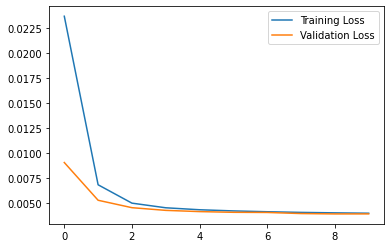

In [13]:
## Check the results
# Plots the loss
plt.figure()
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [8]:
## Evaluate model on test data
encoded_imgs = autoencoder.encoder(X_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

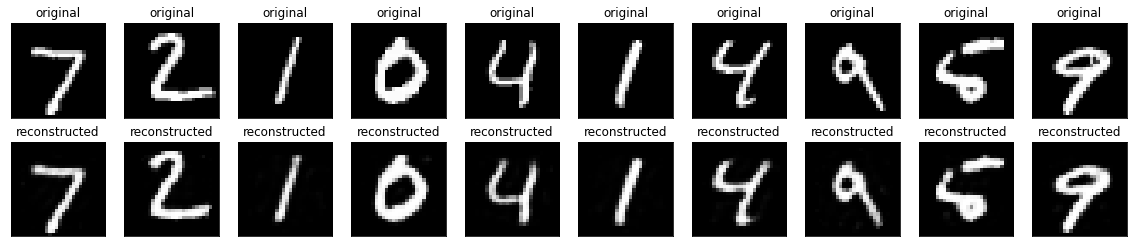

In [10]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()